In [96]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 999)

# import seaborn as sns
import matplotlib.pylab as plt
import math
# import collections
from matplotlib.pyplot import figure

import community
import networkx as nx
# from igraph import *

# from sklearn.cluster import DBSCAN

# from sklearn.neighbors import kneighbors_graph

from sklearn.preprocessing import StandardScaler

from os import listdir
from os.path import isfile, join

from collections import Counter


- Load the header .txt file

In [78]:
columns = pd.read_csv("header.txt", header=None)[0].tolist()

- Select KPIs

In [79]:
KPIS = ['4G_ERI_User_Throughput_DL_kbps', '4G_ERI_User_Throughput_UL_kbps', '4G_ERI_Cell Throughput_DL_kbps', '4G_ERI_Cell Throughput_UL_kbps']
KPIS_threshold = 3 #len(KPIS)

- Specify folder with raw files

In [81]:
path='prooptima_month/'

- List files and select period threshold

In [82]:
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles.sort()

period_thr = math.floor(0.9*len(onlyfiles))

- Function to create google_id 

In [65]:
def to_google_id(row):
        eci = int(row['MAGNETIPD4G.ENODEB_ID']) * 256 + int(row['MAGNETIPD4G.CELLID'])
        return "lte:234:10:%d:%d"%(int(row['MAGNETIPD4G.CELL_TAC']), eci)

- Function to join two strings

In [66]:
def str_join(df, sep, *cols):
   ...:     from functools import reduce
   ...:     return reduce(lambda x, y: x.astype(str).str.cat(y.astype(str), sep=sep), 
   ...:                   [df[col] for col in cols])

In [84]:
sectors_across_time = Counter()
for period in range(len(onlyfiles)):
    data = pd.read_csv(''.join([path,'/',onlyfiles[period]]),sep= "\t", names = columns)
    
    gid = data.apply(to_google_id, axis = 1) # Calculate google id
    data = data.apply(pd.to_numeric, errors='coerce') # Check for corrupted samples
    data['google_id'] = gid # Append google id
    formatter = "{:02d}".format 
    data['hour'] = list(map(formatter, data['hour'].values.tolist()))
    data['period'] = str_join(data, '_','date', 'hour') # Append period
    
    sectors_across_KPIS = Counter()
    for KPI in range(len(KPIS)):
        reshaped = data.pivot(index='google_id', columns= 'period', values=KPIS[KPI])
        # print (reshaped.loc['lte:234:10:32768:128001906'])
        reshaped = reshaped.dropna() # Remove lines with NAs
        sectors_across_KPIS = sectors_across_KPIS + Counter(reshaped.index.values)

    for k in list(sectors_across_KPIS):
        if sectors_across_KPIS[k] < KPIS_threshold:
            del sectors_across_KPIS[k]
    common_sectors_across_KPIS = list(sectors_across_KPIS.keys())
    
    print('The number of intersected sectors on', data.period.unique()[0], 'is:', len(common_sectors_across_KPIS))
    sectors_across_time = sectors_across_time + Counter(common_sectors_across_KPIS)
    

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180901_00 is: 14658
The number of intersected sectors on 20180901_01 is: 14552


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180901_02 is: 14434


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180901_03 is: 14358


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180901_04 is: 14316
The number of intersected sectors on 20180901_05 is: 14431
The number of intersected sectors on 20180901_06 is: 14623
The number of intersected sectors on 20180901_07 is: 14753


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180901_08 is: 14833


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180901_09 is: 14861
The number of intersected sectors on 20180901_10 is: 14872
The number of intersected sectors on 20180901_11 is: 14879


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180901_12 is: 14878
The number of intersected sectors on 20180901_13 is: 14869
The number of intersected sectors on 20180901_14 is: 14862
The number of intersected sectors on 20180901_15 is: 14864


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180901_16 is: 14856
The number of intersected sectors on 20180901_17 is: 14861
The number of intersected sectors on 20180901_18 is: 14858


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180901_19 is: 14846
The number of intersected sectors on 20180901_20 is: 14825
The number of intersected sectors on 20180901_21 is: 14787


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180901_22 is: 14767


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180901_23 is: 14744
The number of intersected sectors on 20180902_00 is: 14680
The number of intersected sectors on 20180902_01 is: 14585
The number of intersected sectors on 20180902_02 is: 14520
The number of intersected sectors on 20180902_03 is: 14416
The number of intersected sectors on 20180902_04 is: 14371


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180902_05 is: 14352
The number of intersected sectors on 20180902_06 is: 14524
The number of intersected sectors on 20180902_07 is: 14671
The number of intersected sectors on 20180902_08 is: 14798
The number of intersected sectors on 20180902_09 is: 14856


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180902_10 is: 14876
The number of intersected sectors on 20180902_11 is: 14885
The number of intersected sectors on 20180902_12 is: 14885


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180902_13 is: 14878
The number of intersected sectors on 20180902_14 is: 14886


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,44,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180902_15 is: 14885
The number of intersected sectors on 20180902_16 is: 14904


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,44,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180902_17 is: 14901
The number of intersected sectors on 20180902_18 is: 14875


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (29,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180902_19 is: 14866
The number of intersected sectors on 20180902_20 is: 14852
The number of intersected sectors on 20180902_21 is: 14829
The number of intersected sectors on 20180902_22 is: 14775
The number of intersected sectors on 20180902_23 is: 14701


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (28,31,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180903_00 is: 14562
The number of intersected sectors on 20180903_01 is: 14436
The number of intersected sectors on 20180903_02 is: 14312
The number of intersected sectors on 20180903_03 is: 14242
The number of intersected sectors on 20180903_04 is: 14284
The number of intersected sectors on 20180903_05 is: 14513
The number of intersected sectors on 20180903_06 is: 14757
The number of intersected sectors on 20180903_07 is: 14865
The number of intersected sectors on 20180903_08 is: 14893
The number of intersected sectors on 20180903_09 is: 14892
The number of intersected sectors on 20180903_10 is: 14874
The number of intersected sectors on 20180903_11 is: 14870
The number of intersected sectors on 20180903_12 is: 14893
The number of intersected sectors on 20180903_13 is: 14895
The number of intersected sectors on 20180903_14 is: 14886
The number of intersected sectors on 20180903_15 is: 14896
The number of intersected sectors on 20180903_16 is: 149

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (24,26,28,31,44,46,72,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180903_17 is: 14905
The number of intersected sectors on 20180903_18 is: 14892
The number of intersected sectors on 20180903_19 is: 14886
The number of intersected sectors on 20180903_20 is: 14853


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180903_21 is: 14822
The number of intersected sectors on 20180903_22 is: 14794
The number of intersected sectors on 20180903_23 is: 14699
The number of intersected sectors on 20180904_00 is: 14539


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180904_01 is: 14390


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (28,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180904_02 is: 14353
The number of intersected sectors on 20180904_03 is: 14307
The number of intersected sectors on 20180904_04 is: 14322
The number of intersected sectors on 20180904_05 is: 14542
The number of intersected sectors on 20180904_06 is: 14770
The number of intersected sectors on 20180904_07 is: 14875
The number of intersected sectors on 20180904_08 is: 14908
The number of intersected sectors on 20180904_09 is: 14910
The number of intersected sectors on 20180904_10 is: 14888
The number of intersected sectors on 20180904_11 is: 14881
The number of intersected sectors on 20180904_12 is: 14894
The number of intersected sectors on 20180904_13 is: 14913
The number of intersected sectors on 20180904_14 is: 14944
The number of intersected sectors on 20180904_15 is: 14940
The number of intersected sectors on 20180904_16 is: 14953
The number of intersected sectors on 20180904_17 is: 14952
The number of intersected sectors on 20180904_18 is: 149

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,46,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180904_21 is: 14892
The number of intersected sectors on 20180904_22 is: 14828
The number of intersected sectors on 20180904_23 is: 14732
The number of intersected sectors on 20180905_00 is: 14605


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,29,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180905_01 is: 14461
The number of intersected sectors on 20180905_02 is: 14338
The number of intersected sectors on 20180905_03 is: 14279
The number of intersected sectors on 20180905_04 is: 14343
The number of intersected sectors on 20180905_05 is: 14555
The number of intersected sectors on 20180905_06 is: 14814


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180905_07 is: 14905
The number of intersected sectors on 20180905_08 is: 14925
The number of intersected sectors on 20180905_09 is: 14936
The number of intersected sectors on 20180905_10 is: 14906
The number of intersected sectors on 20180905_11 is: 14870


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (24,26,46,71,72,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180905_12 is: 14891
The number of intersected sectors on 20180905_13 is: 14893
The number of intersected sectors on 20180905_14 is: 14894
The number of intersected sectors on 20180905_15 is: 14909
The number of intersected sectors on 20180905_16 is: 14919
The number of intersected sectors on 20180905_17 is: 14920
The number of intersected sectors on 20180905_18 is: 14904
The number of intersected sectors on 20180905_19 is: 14883


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180905_20 is: 14847
The number of intersected sectors on 20180905_21 is: 14819
The number of intersected sectors on 20180905_22 is: 14792
The number of intersected sectors on 20180905_23 is: 14686


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,29,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180906_00 is: 14578
The number of intersected sectors on 20180906_01 is: 14414
The number of intersected sectors on 20180906_02 is: 14343
The number of intersected sectors on 20180906_03 is: 14318
The number of intersected sectors on 20180906_04 is: 14346
The number of intersected sectors on 20180906_05 is: 14506
The number of intersected sectors on 20180906_06 is: 14763
The number of intersected sectors on 20180906_07 is: 14881


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (28,31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180906_08 is: 14897
The number of intersected sectors on 20180906_09 is: 14866
The number of intersected sectors on 20180906_10 is: 14840
The number of intersected sectors on 20180906_11 is: 14847
The number of intersected sectors on 20180906_12 is: 14869
The number of intersected sectors on 20180906_13 is: 14874
The number of intersected sectors on 20180906_14 is: 14886
The number of intersected sectors on 20180906_15 is: 14889
The number of intersected sectors on 20180906_16 is: 14909
The number of intersected sectors on 20180906_17 is: 14917
The number of intersected sectors on 20180906_18 is: 14922
The number of intersected sectors on 20180906_19 is: 14890
The number of intersected sectors on 20180906_20 is: 14875
The number of intersected sectors on 20180906_21 is: 14847
The number of intersected sectors on 20180906_22 is: 14801
The number of intersected sectors on 20180906_23 is: 14714
The number of intersected sectors on 20180907_00 is: 145

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (29,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180907_03 is: 14318
The number of intersected sectors on 20180907_04 is: 14312
The number of intersected sectors on 20180907_05 is: 14540
The number of intersected sectors on 20180907_06 is: 14780
The number of intersected sectors on 20180907_07 is: 14890
The number of intersected sectors on 20180907_08 is: 14909
The number of intersected sectors on 20180907_09 is: 14904
The number of intersected sectors on 20180907_10 is: 14873
The number of intersected sectors on 20180907_11 is: 14873
The number of intersected sectors on 20180907_12 is: 14879
The number of intersected sectors on 20180907_13 is: 14878
The number of intersected sectors on 20180907_14 is: 14898
The number of intersected sectors on 20180907_15 is: 14930
The number of intersected sectors on 20180907_16 is: 14940
The number of intersected sectors on 20180907_17 is: 14951


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,31,44,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180907_18 is: 14939
The number of intersected sectors on 20180907_19 is: 14929
The number of intersected sectors on 20180907_20 is: 14917
The number of intersected sectors on 20180907_21 is: 14886
The number of intersected sectors on 20180907_22 is: 14854
The number of intersected sectors on 20180907_23 is: 14804
The number of intersected sectors on 20180908_00 is: 14711
The number of intersected sectors on 20180908_01 is: 14593


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,31,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180908_02 is: 14492
The number of intersected sectors on 20180908_03 is: 14438
The number of intersected sectors on 20180908_04 is: 14357
The number of intersected sectors on 20180908_05 is: 14467
The number of intersected sectors on 20180908_06 is: 14672
The number of intersected sectors on 20180908_07 is: 14846
The number of intersected sectors on 20180908_08 is: 14894
The number of intersected sectors on 20180908_09 is: 14940
The number of intersected sectors on 20180908_10 is: 14946
The number of intersected sectors on 20180908_11 is: 14952
The number of intersected sectors on 20180908_12 is: 14956
The number of intersected sectors on 20180908_13 is: 14970


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,46,72,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180908_14 is: 14963
The number of intersected sectors on 20180908_15 is: 14965
The number of intersected sectors on 20180908_16 is: 14972
The number of intersected sectors on 20180908_17 is: 14952
The number of intersected sectors on 20180908_18 is: 14930
The number of intersected sectors on 20180908_19 is: 14920
The number of intersected sectors on 20180908_20 is: 14894
The number of intersected sectors on 20180908_21 is: 14877


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180908_22 is: 14858
The number of intersected sectors on 20180908_23 is: 14809
The number of intersected sectors on 20180909_00 is: 14761
The number of intersected sectors on 20180909_01 is: 14664
The number of intersected sectors on 20180909_02 is: 14567
The number of intersected sectors on 20180909_03 is: 14491
The number of intersected sectors on 20180909_04 is: 14410
The number of intersected sectors on 20180909_05 is: 14431
The number of intersected sectors on 20180909_06 is: 14570
The number of intersected sectors on 20180909_07 is: 14758
The number of intersected sectors on 20180909_08 is: 14850
The number of intersected sectors on 20180909_09 is: 14921
The number of intersected sectors on 20180909_10 is: 14940
The number of intersected sectors on 20180909_11 is: 14955
The number of intersected sectors on 20180909_12 is: 14956
The number of intersected sectors on 20180909_13 is: 14960
The number of intersected sectors on 20180909_14 is: 149

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180909_20 is: 14877
The number of intersected sectors on 20180909_21 is: 14850
The number of intersected sectors on 20180909_22 is: 14811
The number of intersected sectors on 20180910_00 is: 14602
The number of intersected sectors on 20180910_01 is: 14417
The number of intersected sectors on 20180910_02 is: 14319
The number of intersected sectors on 20180910_03 is: 14317
The number of intersected sectors on 20180910_04 is: 14365
The number of intersected sectors on 20180910_05 is: 14565
The number of intersected sectors on 20180910_06 is: 14821
The number of intersected sectors on 20180910_07 is: 14950
The number of intersected sectors on 20180910_08 is: 14963
The number of intersected sectors on 20180910_09 is: 14907
The number of intersected sectors on 20180910_10 is: 14890
The number of intersected sectors on 20180910_11 is: 14900
The number of intersected sectors on 20180910_12 is: 14913
The number of intersected sectors on 20180910_13 is: 149

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,29,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180911_03 is: 14303
The number of intersected sectors on 20180911_04 is: 14368
The number of intersected sectors on 20180911_05 is: 14560
The number of intersected sectors on 20180911_06 is: 14806
The number of intersected sectors on 20180911_07 is: 14921


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (28,31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180911_08 is: 14945
The number of intersected sectors on 20180911_09 is: 14948
The number of intersected sectors on 20180911_10 is: 14914
The number of intersected sectors on 20180911_11 is: 14941
The number of intersected sectors on 20180911_12 is: 14947
The number of intersected sectors on 20180911_13 is: 14944
The number of intersected sectors on 20180911_14 is: 14948
The number of intersected sectors on 20180911_15 is: 14941
The number of intersected sectors on 20180911_16 is: 14941
The number of intersected sectors on 20180911_17 is: 14930
The number of intersected sectors on 20180911_18 is: 14932
The number of intersected sectors on 20180911_19 is: 14921
The number of intersected sectors on 20180911_20 is: 14888
The number of intersected sectors on 20180911_21 is: 14862
The number of intersected sectors on 20180911_22 is: 14822
The number of intersected sectors on 20180911_23 is: 14726
The number of intersected sectors on 20180912_00 is: 146

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (29,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180912_06 is: 14811
The number of intersected sectors on 20180912_07 is: 14920
The number of intersected sectors on 20180912_08 is: 14947
The number of intersected sectors on 20180912_09 is: 14927
The number of intersected sectors on 20180912_10 is: 14909
The number of intersected sectors on 20180912_11 is: 14926
The number of intersected sectors on 20180912_12 is: 14927
The number of intersected sectors on 20180912_13 is: 14933
The number of intersected sectors on 20180912_14 is: 14937
The number of intersected sectors on 20180912_15 is: 14942
The number of intersected sectors on 20180912_16 is: 14915


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,46,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180912_17 is: 14914
The number of intersected sectors on 20180912_18 is: 14895
The number of intersected sectors on 20180912_19 is: 14901
The number of intersected sectors on 20180912_20 is: 14888
The number of intersected sectors on 20180912_21 is: 14854
The number of intersected sectors on 20180913_00 is: 14612
The number of intersected sectors on 20180913_01 is: 14479
The number of intersected sectors on 20180913_02 is: 14367
The number of intersected sectors on 20180913_03 is: 14332
The number of intersected sectors on 20180913_04 is: 14365
The number of intersected sectors on 20180913_05 is: 14576
The number of intersected sectors on 20180913_06 is: 14833
The number of intersected sectors on 20180913_07 is: 14927
The number of intersected sectors on 20180913_08 is: 14942
The number of intersected sectors on 20180913_09 is: 14930
The number of intersected sectors on 20180913_10 is: 14924
The number of intersected sectors on 20180913_11 is: 149

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,29,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180913_21 is: 14918
The number of intersected sectors on 20180913_22 is: 14863
The number of intersected sectors on 20180913_23 is: 14797
The number of intersected sectors on 20180914_00 is: 14684
The number of intersected sectors on 20180914_01 is: 14547
The number of intersected sectors on 20180914_02 is: 14453
The number of intersected sectors on 20180914_03 is: 14316
The number of intersected sectors on 20180914_04 is: 14412
The number of intersected sectors on 20180914_05 is: 14613
The number of intersected sectors on 20180914_06 is: 14836
The number of intersected sectors on 20180914_07 is: 14962
The number of intersected sectors on 20180914_08 is: 14984
The number of intersected sectors on 20180914_09 is: 14982
The number of intersected sectors on 20180914_10 is: 14980
The number of intersected sectors on 20180914_11 is: 14988
The number of intersected sectors on 20180914_12 is: 14987
The number of intersected sectors on 20180914_13 is: 149

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (44,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180914_15 is: 15004
The number of intersected sectors on 20180914_16 is: 15003
The number of intersected sectors on 20180914_17 is: 14995
The number of intersected sectors on 20180914_18 is: 14993
The number of intersected sectors on 20180914_19 is: 14978
The number of intersected sectors on 20180914_20 is: 14966
The number of intersected sectors on 20180914_21 is: 14924
The number of intersected sectors on 20180914_22 is: 14909
The number of intersected sectors on 20180914_23 is: 14847
The number of intersected sectors on 20180915_00 is: 14774
The number of intersected sectors on 20180915_01 is: 14646
The number of intersected sectors on 20180915_02 is: 14559
The number of intersected sectors on 20180915_03 is: 14498
The number of intersected sectors on 20180915_04 is: 14464
The number of intersected sectors on 20180915_05 is: 14566
The number of intersected sectors on 20180915_06 is: 14747
The number of intersected sectors on 20180915_07 is: 148

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (24,26,27,40,42,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180916_05 is: 14487
The number of intersected sectors on 20180916_06 is: 14623
The number of intersected sectors on 20180916_07 is: 14781
The number of intersected sectors on 20180916_08 is: 14895
The number of intersected sectors on 20180916_09 is: 14938
The number of intersected sectors on 20180916_10 is: 14971
The number of intersected sectors on 20180916_11 is: 14965
The number of intersected sectors on 20180916_12 is: 14965
The number of intersected sectors on 20180916_13 is: 14973
The number of intersected sectors on 20180916_14 is: 14983
The number of intersected sectors on 20180916_15 is: 14970
The number of intersected sectors on 20180916_16 is: 14960
The number of intersected sectors on 20180916_17 is: 14961
The number of intersected sectors on 20180916_18 is: 14952
The number of intersected sectors on 20180916_19 is: 14930
The number of intersected sectors on 20180916_20 is: 14907
The number of intersected sectors on 20180916_21 is: 148

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (25,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180918_02 is: 14405
The number of intersected sectors on 20180918_03 is: 14372
The number of intersected sectors on 20180918_04 is: 14370
The number of intersected sectors on 20180918_05 is: 14597
The number of intersected sectors on 20180918_06 is: 14840
The number of intersected sectors on 20180918_07 is: 14941
The number of intersected sectors on 20180918_08 is: 14961
The number of intersected sectors on 20180918_09 is: 14958
The number of intersected sectors on 20180918_10 is: 14921
The number of intersected sectors on 20180918_11 is: 14910
The number of intersected sectors on 20180918_12 is: 14912
The number of intersected sectors on 20180918_13 is: 14918
The number of intersected sectors on 20180918_14 is: 14932
The number of intersected sectors on 20180918_15 is: 14958
The number of intersected sectors on 20180918_16 is: 14968
The number of intersected sectors on 20180918_17 is: 14976
The number of intersected sectors on 20180918_18 is: 149

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,27,28,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180919_04 is: 14389
The number of intersected sectors on 20180919_05 is: 14583
The number of intersected sectors on 20180919_06 is: 14827
The number of intersected sectors on 20180919_07 is: 14939
The number of intersected sectors on 20180919_08 is: 14957
The number of intersected sectors on 20180919_09 is: 14939
The number of intersected sectors on 20180919_10 is: 14887
The number of intersected sectors on 20180919_11 is: 14677
The number of intersected sectors on 20180919_12 is: 14641
The number of intersected sectors on 20180919_13 is: 14577
The number of intersected sectors on 20180919_14 is: 14594
The number of intersected sectors on 20180919_15 is: 14641
The number of intersected sectors on 20180919_16 is: 14661
The number of intersected sectors on 20180919_17 is: 14679
The number of intersected sectors on 20180919_18 is: 14713
The number of intersected sectors on 20180919_19 is: 14720
The number of intersected sectors on 20180919_20 is: 147

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,29,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180920_00 is: 14529
The number of intersected sectors on 20180920_01 is: 14403
The number of intersected sectors on 20180920_02 is: 14308


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,29,72,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180920_03 is: 14265
The number of intersected sectors on 20180920_04 is: 14334
The number of intersected sectors on 20180920_05 is: 14478
The number of intersected sectors on 20180920_06 is: 14714
The number of intersected sectors on 20180920_07 is: 14824
The number of intersected sectors on 20180920_08 is: 14838
The number of intersected sectors on 20180920_09 is: 14822
The number of intersected sectors on 20180920_10 is: 14822


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,46,71,72,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180920_11 is: 14845
The number of intersected sectors on 20180920_12 is: 14849
The number of intersected sectors on 20180920_13 is: 14869
The number of intersected sectors on 20180920_14 is: 14869
The number of intersected sectors on 20180920_15 is: 14887
The number of intersected sectors on 20180920_16 is: 14890
The number of intersected sectors on 20180920_17 is: 14891
The number of intersected sectors on 20180920_18 is: 14883
The number of intersected sectors on 20180920_19 is: 14869
The number of intersected sectors on 20180920_21 is: 14848
The number of intersected sectors on 20180921_00 is: 14628
The number of intersected sectors on 20180921_01 is: 14524
The number of intersected sectors on 20180921_02 is: 14421
The number of intersected sectors on 20180921_03 is: 14391
The number of intersected sectors on 20180921_04 is: 14385
The number of intersected sectors on 20180921_05 is: 14503
The number of intersected sectors on 20180921_06 is: 147

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (44,46,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180921_16 is: 14941
The number of intersected sectors on 20180921_17 is: 14944
The number of intersected sectors on 20180921_18 is: 14940
The number of intersected sectors on 20180921_19 is: 14930
The number of intersected sectors on 20180921_20 is: 14900
The number of intersected sectors on 20180921_21 is: 14872
The number of intersected sectors on 20180921_22 is: 14888
The number of intersected sectors on 20180921_23 is: 14830
The number of intersected sectors on 20180922_00 is: 14773
The number of intersected sectors on 20180922_01 is: 14653
The number of intersected sectors on 20180922_02 is: 14574


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180922_03 is: 14462
The number of intersected sectors on 20180922_04 is: 14414
The number of intersected sectors on 20180922_05 is: 14516
The number of intersected sectors on 20180922_06 is: 14698
The number of intersected sectors on 20180922_07 is: 14869
The number of intersected sectors on 20180922_08 is: 14945
The number of intersected sectors on 20180922_09 is: 14971
The number of intersected sectors on 20180922_10 is: 14983
The number of intersected sectors on 20180922_11 is: 14981
The number of intersected sectors on 20180922_12 is: 14995
The number of intersected sectors on 20180922_13 is: 14998
The number of intersected sectors on 20180922_14 is: 14999
The number of intersected sectors on 20180922_15 is: 14989
The number of intersected sectors on 20180922_16 is: 14988
The number of intersected sectors on 20180922_17 is: 14985
The number of intersected sectors on 20180922_18 is: 14970
The number of intersected sectors on 20180922_19 is: 149

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (29,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180922_20 is: 14923
The number of intersected sectors on 20180922_21 is: 14908
The number of intersected sectors on 20180922_22 is: 14875
The number of intersected sectors on 20180922_23 is: 14846
The number of intersected sectors on 20180923_00 is: 14768
The number of intersected sectors on 20180923_01 is: 14700
The number of intersected sectors on 20180923_02 is: 14603
The number of intersected sectors on 20180923_03 is: 14513
The number of intersected sectors on 20180923_04 is: 14459
The number of intersected sectors on 20180923_05 is: 14458
The number of intersected sectors on 20180923_06 is: 14581
The number of intersected sectors on 20180923_07 is: 14757
The number of intersected sectors on 20180923_08 is: 14866
The number of intersected sectors on 20180923_09 is: 14919
The number of intersected sectors on 20180923_10 is: 14952
The number of intersected sectors on 20180923_11 is: 14958
The number of intersected sectors on 20180923_12 is: 149

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,29,31,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180924_05 is: 14578
The number of intersected sectors on 20180924_06 is: 14828
The number of intersected sectors on 20180924_07 is: 14951
The number of intersected sectors on 20180924_08 is: 14976
The number of intersected sectors on 20180924_09 is: 14965
The number of intersected sectors on 20180924_10 is: 14948
The number of intersected sectors on 20180924_11 is: 14952
The number of intersected sectors on 20180924_12 is: 14947
The number of intersected sectors on 20180924_13 is: 14948
The number of intersected sectors on 20180924_14 is: 14942
The number of intersected sectors on 20180924_15 is: 14947
The number of intersected sectors on 20180924_16 is: 14967
The number of intersected sectors on 20180924_17 is: 14960
The number of intersected sectors on 20180924_18 is: 14952
The number of intersected sectors on 20180924_19 is: 14937
The number of intersected sectors on 20180924_20 is: 14894
The number of intersected sectors on 20180924_21 is: 148

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,29,31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180925_22 is: 14871


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (28,29,31,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180925_23 is: 14789
The number of intersected sectors on 20180926_00 is: 14666
The number of intersected sectors on 20180926_01 is: 14505


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (25,27,29,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180926_02 is: 14411


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180926_03 is: 14415
The number of intersected sectors on 20180926_04 is: 14385
The number of intersected sectors on 20180926_05 is: 14609
The number of intersected sectors on 20180926_06 is: 14852
The number of intersected sectors on 20180926_07 is: 14938
The number of intersected sectors on 20180926_08 is: 14953
The number of intersected sectors on 20180926_09 is: 14925
The number of intersected sectors on 20180926_10 is: 14892
The number of intersected sectors on 20180926_11 is: 14856
The number of intersected sectors on 20180926_12 is: 14880
The number of intersected sectors on 20180926_13 is: 14917


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (24,26,31,44,46,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180926_14 is: 14924
The number of intersected sectors on 20180926_15 is: 14938
The number of intersected sectors on 20180926_16 is: 14970
The number of intersected sectors on 20180926_17 is: 14976
The number of intersected sectors on 20180926_18 is: 14968
The number of intersected sectors on 20180926_19 is: 14947
The number of intersected sectors on 20180926_20 is: 14938
The number of intersected sectors on 20180926_21 is: 14924
The number of intersected sectors on 20180926_22 is: 14863
The number of intersected sectors on 20180926_23 is: 14769
The number of intersected sectors on 20180927_00 is: 14625
The number of intersected sectors on 20180927_01 is: 14542
The number of intersected sectors on 20180927_02 is: 14430
The number of intersected sectors on 20180927_03 is: 14398
The number of intersected sectors on 20180927_04 is: 14427
The number of intersected sectors on 20180927_05 is: 14618
The number of intersected sectors on 20180927_06 is: 148

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (28,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180927_20 is: 14921
The number of intersected sectors on 20180927_21 is: 14892
The number of intersected sectors on 20180927_22 is: 14851
The number of intersected sectors on 20180927_23 is: 14791
The number of intersected sectors on 20180928_00 is: 14690
The number of intersected sectors on 20180928_01 is: 14585
The number of intersected sectors on 20180928_02 is: 14475
The number of intersected sectors on 20180928_03 is: 14400
The number of intersected sectors on 20180928_04 is: 14460
The number of intersected sectors on 20180928_05 is: 14637
The number of intersected sectors on 20180928_06 is: 14875
The number of intersected sectors on 20180928_07 is: 14959
The number of intersected sectors on 20180928_08 is: 14971
The number of intersected sectors on 20180928_09 is: 14965
The number of intersected sectors on 20180928_10 is: 14935
The number of intersected sectors on 20180928_11 is: 14955
The number of intersected sectors on 20180928_12 is: 149

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (24,26,31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180928_21 is: 14952
The number of intersected sectors on 20180928_22 is: 14925
The number of intersected sectors on 20180928_23 is: 14847
The number of intersected sectors on 20180929_00 is: 14789
The number of intersected sectors on 20180929_01 is: 14684
The number of intersected sectors on 20180929_02 is: 14551
The number of intersected sectors on 20180929_03 is: 14495
The number of intersected sectors on 20180929_04 is: 14501
The number of intersected sectors on 20180929_05 is: 14532
The number of intersected sectors on 20180929_06 is: 14722
The number of intersected sectors on 20180929_07 is: 14907
The number of intersected sectors on 20180929_08 is: 14973
The number of intersected sectors on 20180929_09 is: 14987
The number of intersected sectors on 20180929_10 is: 15006
The number of intersected sectors on 20180929_11 is: 14997
The number of intersected sectors on 20180929_12 is: 15007
The number of intersected sectors on 20180929_13 is: 150

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (29,31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180930_14 is: 15009
The number of intersected sectors on 20180930_15 is: 15018
The number of intersected sectors on 20180930_16 is: 15011
The number of intersected sectors on 20180930_17 is: 15003
The number of intersected sectors on 20180930_18 is: 14980
The number of intersected sectors on 20180930_19 is: 14971


/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,46,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The number of intersected sectors on 20180930_20 is: 14936
The number of intersected sectors on 20180930_21 is: 14909
The number of intersected sectors on 20180930_22 is: 14875
The number of intersected sectors on 20180930_23 is: 14797


In [85]:
for k in list(sectors_across_time):
    if sectors_across_time[k] < period_thr:
        del sectors_across_time[k]
common_sectors_across_time = list(sectors_across_time.keys())

In [86]:
def distance_multipleKPIs(x):
    
    resv = x.values
    
    diff = resv[:, None] - resv[:, None].T # Broadcast
    # diff = np.subtract(resv[:, :, None], resv[:, :, None].T)
    # print(diff.shape)
    
    sq = diff*diff # Square 
    
    return sq

In [ ]:
std = 1

for period in range(len(onlyfiles)):
    data = pd.read_csv(''.join([path,'/',onlyfiles[period]]),sep= "\t", names = columns)

    gid = data.apply(to_google_id, axis = 1) # Calculate google id
    data = data.apply(pd.to_numeric, errors='coerce') # Check for corrupted samples
    data['google_id'] = gid # Append google id 
    formatter = "{:02d}".format 
    data['hour'] = list(map(formatter, data['hour'].values.tolist()))
    data['period'] = str_join(data, '_','date', 'hour') # Append period
    
    for KPI in range(len(KPIS)):
        # print ('Day: ', days, ' Hour: ', w, ' KPI: ', i)
        reshaped = data.pivot(index='google_id', columns = 'period', values=KPIS[KPI])
        #reshaped = reshaped.loc[reshaped.index.isin(common_sectors_across_days)] 
        reshaped = reshaped.reindex(common_sectors_across_time)
        
        if std==0:
            sq = distance_multipleKPIs(reshaped)
        else:
            reshaped_std = pd.DataFrame(StandardScaler().fit_transform(X=reshaped), index = reshaped.index, columns = reshaped.columns)
            sq = distance_multipleKPIs(reshaped_std.iloc[:,0])
        d_matrix_KPI = np.zeros((sq.shape[0], sq.shape[0]))
        if KPI==0:
            or_na_KPI = ~np.logical_or(d_matrix_KPI,np.isnan(sq))*1
            sq[np.isnan(sq)] = 0
            sq_kpis = sq
        else:
            or_na_KPI = or_na_KPI + ~np.logical_or(d_matrix_KPI,np.isnan(sq))*1
            sq[np.isnan(sq)] = 0
            sq_kpis = sq_kpis + sq
        del sq 
    or_na_KPI = or_na_KPI.astype('float')
    or_na_KPI[or_na_KPI<KPIS_threshold] = 'nan'
    sq_kpis = np.divide(sq_kpis,or_na_KPI)
    
    d_matrix_period = np.zeros((sq_kpis.shape[0], sq_kpis.shape[0]))
    if period==0:
        or_na_period = ~np.logical_or(d_matrix_period,np.isnan(sq_kpis))*1
        sq_kpis[np.isnan(sq_kpis)] = 0
        sq_period = sq_kpis
    else:
        or_na_period = or_na_period + ~np.logical_or(d_matrix_period,np.isnan(sq_kpis))*1
        sq_kpis[np.isnan(sq_kpis)] = 0
        sq_period = sq_period + sq_kpis
    del sq_kpis
#or_na_period = or_na_period.astype('float')
#or_na_period[or_na_period<period_thr] = 'nan'
sq_period = np.divide(sq_period,or_na_period)
print(sq_period)
print(or_na_period)

dist = np.sqrt(sq_period)     

del sq_period

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivi

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (24,26,28,31,44,46,72,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  i

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,29,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=inter

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (28,31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  inte

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,31,44,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=inter

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,31,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivi

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactiv

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactiv

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivi

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (44,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=in

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (28,31,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=inter

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interact

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (44,46,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interac

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,29,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interact

In [89]:
def distance_cost_plot(distances):
    figure(figsize = (10,10)) # Change to see better resolution
    im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
    plt.gca().invert_yaxis()
    plt.xlabel('x')
    plt.ylabel('y')
    # plt.grid()
    plt.colorbar();

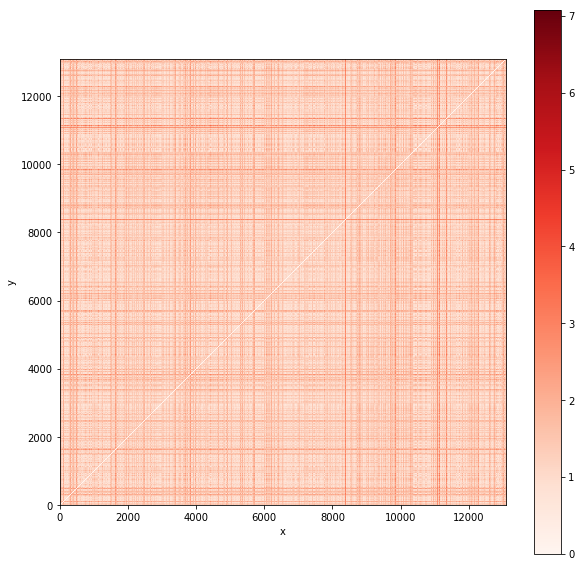

In [90]:
distance_cost_plot(dist)

## Community Detection - Louvain

In [156]:
subdist = dist.copy()
# subdist = subdist[:20,:20]
# distance_cost_plot(subdist)

#### K-Nearest Neigbors (KNN)

- Replace the diagonal with inf values

In [157]:
subdist[subdist == 0] = 'inf'

- Sort each row of the distance matrix 
    - Return a sorted matrix with weights
    - Return a sorted matrix with indexes

In [158]:
srt_weights = np.sort(subdist, axis=1)
srt_indexes = np.argsort(subdist, axis=1)

- KNN algorithm
    - Select number of neighbours
    - Return a matrix with shape [number_of_neighbours,number_of_sectors]

In [159]:
neighbours = 5
knn = srt_indexes[:,:neighbours].T

- Build the network graph
    - Add the connection between the nodes
    - Weight is defined as the distance between two nodes

In [160]:
G = nx.Graph()
for i in range(knn.shape[1]):
    for j in range(knn.shape[0]):
        G.add_edge(i, knn[j][i], weight=srt_weights[i][j])

- Visualize the graph

In [161]:
# pos = nx.spring_layout(G, scale=50.)
# nx.draw_networkx_nodes(G, pos)
# nx.draw_networkx_edges(G,pos)
# nx.draw_networkx_labels(G,pos)
# plt.axis('off')
# plt.show()

- compute the best partition based on Louvein heuristics
    - Resolution can be a hyperparameter

In [162]:
partition = community.best_partition(G,resolution = 0.01)

In [163]:
community.modularity(partition,G)

0.2382349059579864

- Communities

In [164]:
how_many_communities = len(set(list(partition.values())))
how_many_communities

1238

- Create the communities

In [165]:
c = []

for i in range(how_many_communities):
    c.append(dict((key,value) for key, value in partition.items() if value == i))

In [166]:
r = []

for KPI in range(len(KPIS)):
    for period in range(24):
        data = pd.read_csv(''.join([path,'/',onlyfiles[period]]),sep= "\t", names = columns)

        gid = data.apply(to_google_id, axis = 1) # Calculate google id
        data = data.apply(pd.to_numeric, errors='coerce') # Check for corrupted samples
        data['google_id'] = gid # Append google id
        formatter = "{:02d}".format 
        data['hour'] = list(map(formatter, data['hour'].values.tolist()))
        data['period'] = str_join(data, '_','date', 'hour') # Append period

        reshaped = data.pivot(index='google_id', columns= 'period', values=KPIS[KPI])
        reshaped = reshaped.reindex(common_sectors_across_time)
        if period==0:
            reshaped_c = reshaped # Remove lines with NAs
        else:
            reshaped_c = pd.merge(reshaped_c, reshaped, left_index=True, right_index=True)
    r.append(reshaped_c)

/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,31,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/b.kko/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity,

In [261]:
#### Define a list of clusters here
clusters = []

for i in range(how_many_communities):
    clusters.append(r[2].iloc[list(c[i].keys())])

- Plot a cluster

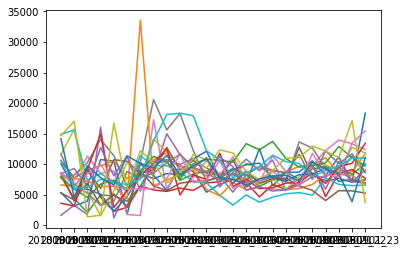

In [262]:
plt.plot(clusters[0].T)

## Anomaly detection

- Pick one cluster

In [263]:
CST = clusters[0]

In [264]:
th = 1

- Calculate mean and standard deviation per day

In [265]:
m = CST.mean()
s = CST.std()

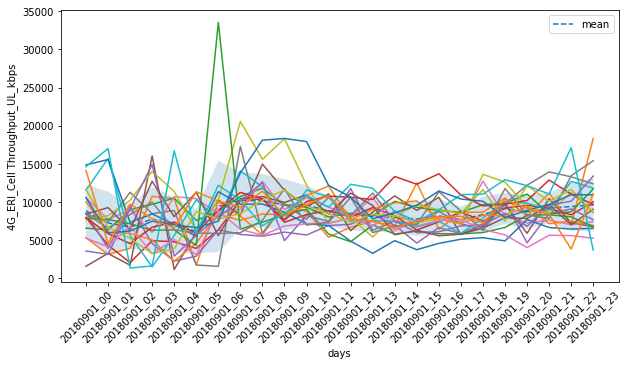

In [266]:
plt.figure(figsize=(10,5))
plt.plot(m,label = 'mean', ls='--',)
plt.xticks(rotation=45)

# plt.plot(m+s/2,label = 'std_u')
# plt.plot(m-s/2,label = 'std_l')
plt.fill_between(m.index, m + th*s, m - th*s, alpha=0.2)
plt.plot(CST.T)
plt.xlabel('days')
plt.ylabel('4G_ERI_Cell Throughput_UL_kbps')
plt.legend()